In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('traffic.csv')
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [4]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [5]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Date_no'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,2015-11-01,0,1
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,2015-11-01,1,1
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,2015-11-01,2,1
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,2015-11-01,3,1
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,2015-11-01,4,1
...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017,6,2017-06-30,19,30
48116,2017-06-30 20:00:00,4,30,20170630204,2017,6,2017-06-30,20,30
48117,2017-06-30 21:00:00,4,16,20170630214,2017,6,2017-06-30,21,30
48118,2017-06-30 22:00:00,4,22,20170630224,2017,6,2017-06-30,22,30


In [6]:
df.set_index('DateTime', inplace=True)

In [7]:
df = pd.get_dummies(df, columns=['Date_no'], drop_first=True)
df

,Junction,Vehicles,ID,Year,Month,Hour,Day,Date_no_2015-11-02,Date_no_2015-11-03,Date_no_2015-11-04,...,Date_no_2017-06-21,Date_no_2017-06-22,Date_no_2017-06-23,Date_no_2017-06-24,Date_no_2017-06-25,Date_no_2017-06-26,Date_no_2017-06-27,Date_no_2017-06-28,Date_no_2017-06-29,Date_no_2017-06-30
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-11-01 00:00:00,1,15,20151101001,2015,11,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-11-01 02:00:00,1,10,20151101021,2015,11,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-11-01 03:00:00,1,7,20151101031,2015,11,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-11-01 04:00:00,1,9,20151101041,2015,11,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,4,11,20170630194,2017,6,19,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2017-06-30 20:00:00,4,30,20170630204,2017,6,20,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2017-06-30 21:00:00,4,16,20170630214,2017,6,21,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df.dtypes

Junction              int64
Vehicles              int64
ID                    int64
Year                  int64
Month                 int64
                      ...  
Date_no_2017-06-26    uint8
Date_no_2017-06-27    uint8
Date_no_2017-06-28    uint8
Date_no_2017-06-29    uint8
Date_no_2017-06-30    uint8
Length: 614, dtype: object

In [9]:
target_variable = 'Vehicles'
X = df.drop(target_variable, axis=1)
y = df[target_variable]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 60.287675579159746


In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

R-squared (R2): 0.8520717525641592


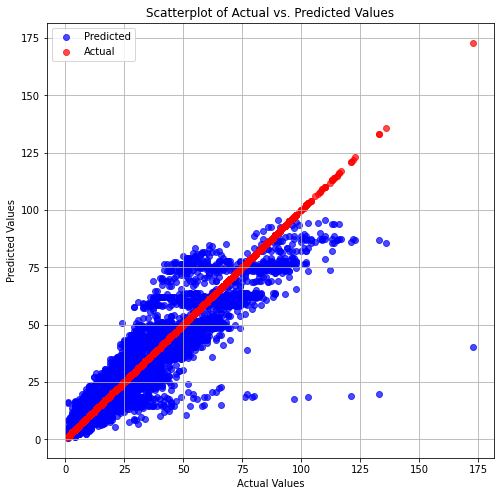

In [15]:
# Plot the actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.7)
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have true values (actual observations) and forecasted values
# Replace 'true_values' and 'forecast_values' with your actual variable names

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')




Mean Absolute Error (MAE): 5.054003485953025
Mean Squared Error (MSE): 60.287675579159746
Root Mean Squared Error (RMSE): 7.764513866248147
Mean Absolute Percentage Error (MAPE): 31.805222074529777%
